In [1]:
import pandas as pd

# Load dataset from URL
url = "Covid.csv"
df = pd.read_csv(url)

# Display first few rows
print(df(10)


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [2]:
# Keep important columns
columns_to_keep = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']
df = df[columns_to_keep]

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing values
df.dropna(inplace=True)

# Filter for a few countries (optional)
countries = ['India', 'United States', 'Brazil']
df = df[df['location'].isin(countries)]

print(df.head())


      location       date  total_cases  new_cases  total_deaths  new_deaths
50234   Brazil 2020-01-05          0.0        0.0           0.0         0.0
50235   Brazil 2020-01-06          0.0        0.0           0.0         0.0
50236   Brazil 2020-01-07          0.0        0.0           0.0         0.0
50237   Brazil 2020-01-08          0.0        0.0           0.0         0.0
50238   Brazil 2020-01-09          0.0        0.0           0.0         0.0


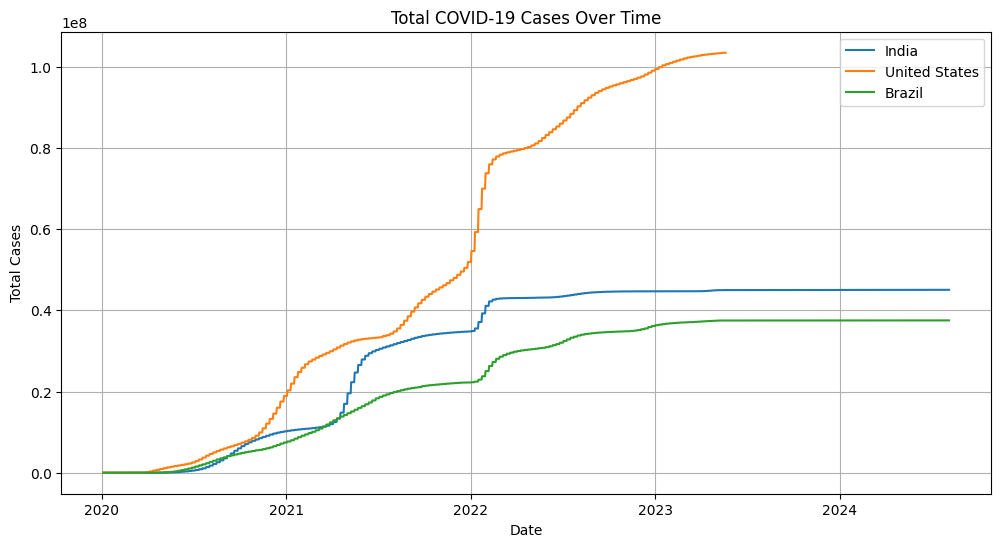

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total cases over time for each country
plt.figure(figsize=(12, 6))
for country in countries:
    data = df[df['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load and clean COVID-19 data
def load_data():
    df = pd.read_csv("Covid.csv")
    df['date'] = pd.to_datetime(df['date'])
    required_columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']
    df = df[required_columns].dropna()
    return df

# Load the data
df = load_data()

# Create dropdown for country selection
country_dropdown = widgets.Dropdown(
    options=sorted(df['location'].unique()),
    description='Select Country:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Create output area for displaying the charts
output_area = widgets.Output()

# Function to update plots based on selected country
def update_charts(change):
    with output_area:
        clear_output(wait=True)
        
        selected_country = country_dropdown.value
        country_df = df[df['location'] == selected_country]

        display(widgets.HTML(f"<h3>COVID-19 Analysis for {selected_country}</h3>"))

        fig_total_cases = px.line(country_df, x='date', y='total_cases',
                                  title='Total Cases Over Time')
        fig_new_cases = px.line(country_df, x='date', y='new_cases',
                                title='New Cases Over Time')
        fig_total_deaths = px.line(country_df, x='date', y='total_deaths',
                                   title='Total Deaths Over Time')

        fig_total_cases.show()
        fig_new_cases.show()
        fig_total_deaths.show()

# Set observer for dropdown widget
country_dropdown.observe(update_charts, names='value')

# Display widgets
display(country_dropdown)
display(output_area)

# Trigger initial view (e.g., India or first in list)
country_dropdown.value = 'India' if 'India' in df['location'].values else df['location'].iloc[0]


Dropdown(description='Select Country:', layout=Layout(width='50%'), options=('Afghanistan', 'Africa', 'Albania…

Output()